## Import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
import random
import matplotlib.patches as mpatches
from collections import Counter
import functools
import operator
from itertools import chain
import pandas as pd
import glob, os
import shutil as sh
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
from statistics import mean
import statistics

In [2]:
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.vcf')]
    list_of_DFs = []
    for file in filelist: 
#         print(file)
        DF = path + '/' + file + '.vcf'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file['sample'] = DF
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

def load_cleaned_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.csv')]
    list_of_DFs = []
    for file in filelist: 
#         print(file)
        DF = path + '/' + file + '.csv'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file['sample'] = DF
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

# clean up the VCF files and save as CSV files 

def clean_dataframes(path, list_of_DFs):
    if not os.path.exists(path + '/cleaned'):
            os.makedirs(path + '/cleaned')
    for DF in list_of_DFs:
        DF = DF[['sample', 'Position', 'Ref', 'Cons']]
        DF['sample'] = DF['sample'].map(lambda x: x.lstrip('data_raw/VCFs/'))
        DF['sample'] = DF['sample'].map(lambda x: x.rstrip('.fasta.vcf'))
        DF['sample'] = DF['sample'].map(lambda x: x.lstrip('SA_'))
        sample = DF['sample'].values[0]
        DF['Position'] = DF['Position'].apply(str)
        DF['SNP'] = DF['Position'] + '_' + DF['Ref'] + '>' + DF['Cons']
        DF.to_csv(path + 'cleaned/' + sample + '-cleaned.csv', sep='\t')
        
def make_snp_list(path, list_of_DFs):
    list_of_lists = []
    for DF in list_of_DFs:
        DF = DF['SNP'].tolist()
        list_of_lists.append(DF)
    return(list_of_lists)
        

def make_dictionary(path, list_of_DFs):
    names_and_snpies = {}
    for DF in list_of_DFs:
        key = DF['sample'].values[0]
        key = key.strip('VCFs/cleaned//')
        key = key.strip('-cleaned.csv')
        value = DF['SNP'].tolist()
        names_and_snpies[key] = value
    return(names_and_snpies)

def get_unique_snps(path, list_of_DFs):
    all_samples = pd.concat(list_of_DFs)
    all_samples = all_samples.drop(axis=1, columns=['sample','Position','Ref','Cons','Unnamed: 0'])
    all_samples = all_samples.drop_duplicates(keep='first')
    all_samples = all_samples.reset_index()
    all_samples = all_samples.drop(axis=1, columns='index')
    return (all_samples)

In [ ]:
NTDdels = {'USA/MA-JLL-D18/2020' : 'contains del in NTD',
'USA/MA-JLL-D25/2020' : 'contains del in NTD',
'USA/MA-JLL-D75/2020' : 'contains del in NTD',
'USA/MA-JLL-D81/2020' : 'contains del in NTD',
'USA/MA-JLL-D128/2020' : 'contains del in NTD',
'USA/MA-JLL-D130/2020' : 'contains del in NTD',
'USA/MA-JLL-D143/2020' : 'contains del in NTD',
'USA/MA-JLL-D146/2020' : 'contains del in NTD',
'USA/MA-JLL-D152/2020' : 'contains del in NTD',
'England/NOTT-112538/2020' : 'contains del in NTD',
'England/NOTT-112E1F/2020' : 'contains del in NTD',
'Bahrein/BAH-24/2020' : 'contains del in NTD',
'Japan/PG-0327/2020' : 'contains del in NTD',
'USA/WI-WSLH-200057/2020' : 'contains del in NTD',
'USA/CA-CZB-1122/2020' : 'contains del in NTD',
'USA/CA-CZB-1104/2020' : 'contains del in NTD',
'USA/WA-RML-6/2020' : 'contains del in NTD',
'USA/WA-RML-2/2020' : 'contains del in NTD',
'Singapore/1337/2020' : 'contains del in NTD',
'Japan/PG-0119/2020' : 'contains del in NTD',
'England/CAMB-74456/2020' : 'contains del in NTD',
'England/NOTT-111663/2020' : 'contains del in NTD',
'England/BIRM-635A2/2020' : 'contains del in NTD',
'England/BIRM-635EE/2020' : 'contains del in NTD',
'Kenya/C2777/2020' : 'contains del in NTD',
'England/ALDP-B752AB/2020' : 'contains del in NTD',
'England/BIRM-66F65/2020' : 'contains del in NTD',
'England/ALDP-9E6E1C/2020' : 'contains del in NTD',
'Scotland/EDB6065/2020' : 'contains del in NTD',
'Scotland/EDB6599/2020' : 'contains del in NTD',
'England/EXET-139F1F/2020' : 'contains del in NTD',
'Iceland/352/2020' : 'contains del in NTD',
'USA/CA-ALSR-4199/2020' : 'contains del in NTD',
'Spain/MD-HLP-R90/2020' : 'contains del in NTD',
'Portugal/PT1071/2020' : 'contains del in NTD',
'England/ALDP-B7487D/2020' : 'contains del in NTD',
'India/GJ-GBRC278a/2020' : 'contains del in NTD',
'India/GJ-GBRC278b/2020' : 'contains del in NTD',
'USA/NY-MSK-3E/2020' : 'contains del in NTD',
'USA/NY-MSK-6H/2020' : 'contains del in NTD',
'USA/NY-MSK-6G/2020' : 'contains del in NTD',
'USA/NY-MSK-6Fi/2020' : 'contains del in NTD',
'USA/NY-MSK-6Hi/2020' : 'contains del in NTD',
'USA/MA-MASPHL-00363/2020' : 'contains del in NTD',
'USA/TX-DSHS-0069/2020' : 'contains del in NTD',
'USA/WI-UW-2731/2021' : 'contains del in NTD',
'USA/MI-UM-10036708345/2020' : 'contains del in NTD',
'USA/MI-UM-10036708377/2020' : 'contains del in NTD',
'USA/MI-UM-10036708325/2020' : 'contains del in NTD',
'USA/CA-SR0187/2020' : 'contains del in NTD',
'England/CAMB-1AC515/2020' : 'contains del in NTD',
'Kenya/C5288/2020' : 'contains del in NTD',
'England/NOTT-10EAC7/2020' : 'contains del in NTD',
'USA/TX-DSHS-0388/2020' : 'contains del in NTD',
'Nigeria/ON507-CV44/2020' : 'contains del in NTD',
'Scotland/CVR3228/2020' : 'contains del in NTD',
'England/LIVE-9F570/2020' : 'contains del in NTD',
'England/SHEF-C6AAE/2020' : 'contains del in NTD',
'England/LIVE-A9519/2020' : 'contains del in NTD',
'England/BRIS-1853FAC/2020' : 'contains del in NTD',
'England/BIRM-61322/2020' : 'contains del in NTD',
'USA/WI-WSLH-200465/2020' : 'contains del in NTD',
'England/LIVE-A02FD/2020' : 'contains del in NTD',
'Japan/PG-5733/2020' : 'contains del in NTD',
'Japan/PG-2770/2020' : 'contains del in NTD',
'Japan/PG-2773/2020' : 'contains del in NTD',
'Japan/PG-2774/2020' : 'contains del in NTD',
'England/NORW-EC3E3/2020' : 'contains del in NTD',
'Scotland/EDB7787/2020' : 'contains del in NTD',
'Scotland/EDB7798/2020' : 'contains del in NTD',
'England/QEUH-9AF4B3/2020' : 'contains del in NTD',
'England/CAMB-1BB856/2020' : 'contains del in NTD',
'England/ALDP-9440DA/2020' : 'contains del in NTD',
'England/CAMC-94C2EB/2020' : 'contains del in NTD',
'England/NOTT-11CED9/2020' : 'contains del in NTD',
'England/SHEF-C7F35/2020' : 'contains del in NTD',
'England/ALDP-95C6CE/2020' : 'contains del in NTD',
'England/ALDP-5C548E/2020' : 'contains del in NTD',
'England/ALDP-95C6BF/2020' : 'contains del in NTD',
'England/ALDP-A694A5/2020' : 'contains del in NTD',
'England/ALDP-A6D7F3/2020' : 'contains del in NTD',
'Australia/VIC8656/2020' : 'contains del in NTD',
'Australia/VIC14765/2020' : 'contains del in NTD',
'Denmark/DCGC-8621/2020' : 'contains del in NTD',
'Denmark/DCGC-11759/2020' : 'contains del in NTD',
'Denmark/DCGC-7630/2020' : 'contains del in NTD',
'Denmark/DCGC-8029/2020' : 'contains del in NTD',
'Denmark/DCGC-8789/2020' : 'contains del in NTD',
'Denmark/DCGC-8030/2020' : 'contains del in NTD'}

metadata['study'] = metadata['strain'].map(NTDdels)




In [3]:
%%bash
conda activate nextstrain
augur filter --sequences data/sequences.fasta --metadata data/metadata.tsv --group-by month year submitting_lab --exclude-where 'campus!=UW-Madison' --output data/UWMadisonDorm.fasta



4886 sequences were dropped during filtering
	4886 of these were dropped because of 'campus!=UW-Madison'
278 sequences have been written out to data/UWMadisonDorm.fasta



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [25]:
%%bash
splitfasta UWMadisonDorm.fasta

In [44]:
%%bash

for f in UWMadisonDorm_split_files/*; do 
    faidx -x $f
done

In [46]:
%%bash
mv USA*.fasta dormfiles

In [51]:
%%bash 

# UW Madison Dorm samples, this takes ~10 mins to run 

for file in $(ls dormfiles/*.fasta)
do 
    bbmap.sh in=$file out=$file.bam ref=ref.fa #map to Wuhan reference
    samtools sort $file.bam -o $file.bam # sort the bam 
    samtools mpileup -f ref.fa $file.bam > $file.pileup # generate a pileup file
    java -jar VarScan.jar pileup2snp $file.pileup --min-coverage 1 --min-reads2 1 > $file.vcf
done

##

/Users/gagemoreno/opt/anaconda3/opt/bbmap-38.84-0//calcmem.sh: line 75: [: -v: unary operator expected
Max memory cannot be determined.  Attempting to use 3200 MB.
If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, 
or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.
java -ea -Xmx3200m -Xms3200m -cp /Users/gagemoreno/opt/anaconda3/opt/bbmap-38.84-0/current/ align2.BBMap build=1 overwrite=true fastareadlen=500 in=dormfiles/USAWI-UW-14182020.fasta out=dormfiles/USAWI-UW-14182020.fasta.bam ref=ref.fa
Executing align2.BBMap [build=1, overwrite=true, fastareadlen=500, in=dormfiles/USAWI-UW-14182020.fasta, out=dormfiles/USAWI-UW-14182020.fasta.bam, ref=ref.fa]
Version 38.84

Retaining first best site only for ambiguous mappings.
NOTE:	Deleting contents of ref/genome/1 because reference is specified and overwrite=true
NOTE:	Deleting contents of ref/index/1 because reference is specified and overwrite=true
Writing refere

In [52]:
# move *.vcf files from dormfiles to data_derived (in consensus_SNVs)
# Dorms

root_path = "dormfiles/"
dest_path = "VCFs/"

for dirpath, dnames, fnames in os.walk(root_path):    
    for f in fnames:
        if f.endswith(".vcf"):
            source_file_path =  os.path.join(dirpath, f)
            dest_file_path   =  os.path.join(dest_path, f)
            sh.copyfile(source_file_path, dest_file_path)

In [54]:
# dormfiles cleanup 

dir_name = "dormfiles/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".bam"):
        os.remove(os.path.join(dir_name, item))
        
for item in test:
    if item.endswith(".pileup"):
        os.remove(os.path.join(dir_name, item))
        
for item in test:
    if item.endswith(".vcf"):
        os.remove(os.path.join(dir_name, item))

In [3]:
list_of_DFs=load_dataframes('VCFs/')

['USAWI-UW-14182020.fasta', 'USAWI-UW-14192020.fasta', 'USAWI-UW-14202020.fasta', 'USAWI-UW-14212020.fasta', 'USAWI-UW-14222020.fasta', 'USAWI-UW-14232020.fasta', 'USAWI-UW-14242020.fasta', 'USAWI-UW-14252020.fasta', 'USAWI-UW-14262020.fasta', 'USAWI-UW-14272020.fasta', 'USAWI-UW-14282020.fasta', 'USAWI-UW-14292020.fasta', 'USAWI-UW-14302020.fasta', 'USAWI-UW-14312020.fasta', 'USAWI-UW-14322020.fasta', 'USAWI-UW-16302020.fasta', 'USAWI-UW-16312020.fasta', 'USAWI-UW-16322020.fasta', 'USAWI-UW-16332020.fasta', 'USAWI-UW-16342020.fasta', 'USAWI-UW-16352020.fasta', 'USAWI-UW-16362020.fasta', 'USAWI-UW-16372020.fasta', 'USAWI-UW-16382020.fasta', 'USAWI-UW-16392020.fasta', 'USAWI-UW-16402020.fasta', 'USAWI-UW-16412020.fasta', 'USAWI-UW-16422020.fasta', 'USAWI-UW-16432020.fasta', 'USAWI-UW-16442020.fasta', 'USAWI-UW-16452020.fasta', 'USAWI-UW-16462020.fasta', 'USAWI-UW-16472020.fasta', 'USAWI-UW-16482020.fasta', 'USAWI-UW-16492020.fasta', 'USAWI-UW-16502020.fasta', 'USAWI-UW-16512020.fasta', 

In [4]:
clean_dataframes('VCFS/', list_of_DFs)

/Users/gagemoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gagemoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gagemoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

KeyboardInterrupt: 

In [5]:
cleaned = load_cleaned_dataframes('VCFs/cleaned/')

['USAWI-UW-14182020-cleaned', 'USAWI-UW-14192020-cleaned', 'USAWI-UW-14202020-cleaned', 'USAWI-UW-14212020-cleaned', 'USAWI-UW-14222020-cleaned', 'USAWI-UW-14232020-cleaned', 'USAWI-UW-14242020-cleaned', 'USAWI-UW-14252020-cleaned', 'USAWI-UW-14262020-cleaned', 'USAWI-UW-14272020-cleaned', 'USAWI-UW-14282020-cleaned', 'USAWI-UW-14292020-cleaned', 'USAWI-UW-14302020-cleaned', 'USAWI-UW-14312020-cleaned', 'USAWI-UW-14322020-cleaned', 'USAWI-UW-16302020-cleaned', 'USAWI-UW-16312020-cleaned', 'USAWI-UW-16322020-cleaned', 'USAWI-UW-16332020-cleaned', 'USAWI-UW-16342020-cleaned', 'USAWI-UW-16352020-cleaned', 'USAWI-UW-16362020-cleaned', 'USAWI-UW-16372020-cleaned', 'USAWI-UW-16382020-cleaned', 'USAWI-UW-16392020-cleaned', 'USAWI-UW-16402020-cleaned', 'USAWI-UW-16412020-cleaned', 'USAWI-UW-16422020-cleaned', 'USAWI-UW-16432020-cleaned', 'USAWI-UW-16442020-cleaned', 'USAWI-UW-16452020-cleaned', 'USAWI-UW-16462020-cleaned', 'USAWI-UW-16472020-cleaned', 'USAWI-UW-16482020-cleaned', 'USAWI-UW-164

In [6]:
list_of_snps = make_snp_list('VCFs/Cleaned/', cleaned)

In [7]:
snps_in_dorms = make_dictionary('VCFs/Cleaned/', cleaned)

In [ ]:
snps_in_dorms

In [9]:
# this function rnadomly chooses and compares two of the above lists and returns % overlap in snp identities 

def diff(lists_of_lists, repeat_times):
    percent_overlap_distribution = []
    for i in range(repeat_times):
        li1 = random.choices(lists_of_lists, k=1)
        li2 = random.choices(lists_of_lists, k=1)
        li1 = li1[0]
        li2 = li2[0]
        len1 = len(li1)
        len2 = len(li2)
        total_len = len1 + len2
        overlap = (1 - (len((list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))) / total_len)) * 100
        percent_overlap_distribution.append(overlap)
    return(percent_overlap_distribution)

# compare two particular lists 

def compare(li1, li2):
    li1 = li1[0]
    li2 = li2[0]
    len1 = len(li1)
    len2 = len(li2)
    total_len = len1 + len2
    overlap = (1 - (len((list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))) / total_len)) * 100
#     print(1 - overlap)
    return(overlap)

#

In [11]:
# compare roommates in dorms

roommates1 = compare(snps_in_dorms['USAWI-UW-17932020'],snps_in_dorms['USAWI-UW-18632020'])
print(roommates1)
roommates2 = compare(snps_in_dorms['USAWI-UW-18302020'],snps_in_dorms['USAWI-UW-18532020'])
print(roommates2)
roommates3 = compare(snps_in_dorms['USAWI-UW-18052020'],snps_in_dorms['USAWI-UW-16492020'])
print(roommates3)
roommates4 = compare(snps_in_dorms['USAWI-UW-18402020'],snps_in_dorms['USAWI-UW-18352020'])
print(roommates4)
roommates5 = compare(snps_in_dorms['USAWI-UW-16302020'],snps_in_dorms['USAWI-UW-18342020'])
print(roommates5)
roommates6 = compare(snps_in_dorms['USAWI-UW-16352020'],snps_in_dorms['USAWI-UW-18622020'])
print(roommates6)
roommates7 = compare(snps_in_dorms['USAWI-UW-16592020'],snps_in_dorms['USAWI-UW-18022020'])
print(roommates7)
roommates8 = compare(snps_in_dorms['USAWI-UW-18082020'],snps_in_dorms['USAWI-UW-18322020'])
print(roommates8)
roommates9 = compare(snps_in_dorms['USAWI-UW-16342020'],snps_in_dorms['USAWI-UW-16422020'])
print(roommates9)
roommates10 = compare(snps_in_dorms['USAWI-UW-16462020'],snps_in_dorms['USAWI-UW-16632020'])
print(roommates10)
roommates11 = compare(snps_in_dorms['USAWI-UW-18472020'],snps_in_dorms['USAWI-UW-18592020'])
print(roommates11)
roommates12 = compare(snps_in_dorms['USAWI-UW-17952020'],snps_in_dorms['USAWI-UW-18552020'])
print(roommates12)
roommates13 = compare(snps_in_dorms['USAWI-UW-18392020'],snps_in_dorms['USAWI-UW-18542020'])
print(roommates13)
roommates14 = compare(snps_in_dorms['USAWI-UW-17942020'],snps_in_dorms['USAWI-UW-16702020'])
print(roommates14)
roommates15 = compare(snps_in_dorms['USAWI-UW-16832020'],snps_in_dorms['USAWI-UW-17662020'])
print(roommates15)
roommates16 = compare(snps_in_dorms['USAWI-UW-17262020'],snps_in_dorms['USAWI-UW-16822020'])
print(roommates16)
roommates17 = compare(snps_in_dorms['USAWI-UW-18192020'],snps_in_dorms['USAWI-UW-18252020'])
print(roommates17)
roommates18 = compare(snps_in_dorms['USAWI-UW-17392020'],snps_in_dorms['USAWI-UW-17762020'])
print(roommates18)
roommates19 = compare(snps_in_dorms['USAWI-UW-17542020'],snps_in_dorms['USAWI-UW-17572020'])
print(roommates19)
roommates20 = compare(snps_in_dorms['USAWI-UW-17512020'],snps_in_dorms['USAWI-UW-17442020'])
print(roommates20)
roommates21 = compare(snps_in_dorms['USAWI-UW-16852020'],snps_in_dorms['USAWI-UW-17252020'])
print(roommates21)
roommates22 = compare(snps_in_dorms['USAWI-UW-17162020'],snps_in_dorms['USAWI-UW-17602020'])
print(roommates22)
roommates23 = compare(snps_in_dorms['USAWI-UW-17752020'],snps_in_dorms['USAWI-UW-17812020'])
print(roommates23)
roommates24 = compare(snps_in_dorms['USAWI-UW-17362020'],snps_in_dorms['USAWI-UW-18152020'])
print(roommates24)
roommates25 = compare(snps_in_dorms['USAWI-UW-17452020'],snps_in_dorms['USAWI-UW-17422020'])
print(roommates25)
roommates26 = compare(snps_in_dorms['USAWI-UW-17032020'],snps_in_dorms['USAWI-UW-17702020'])
print(roommates26)
roommates27 = compare(snps_in_dorms['USAWI-UW-17382020'],snps_in_dorms['USAWI-UW-17632020'])
print(roommates27)
roommates28 = compare(snps_in_dorms['USAWI-UW-16862020'],snps_in_dorms['USAWI-UW-18062020'])
print(roommates28)
roommates29 = compare(snps_in_dorms['USAWI-UW-17502020'],snps_in_dorms['USAWI-UW-17532020'])
print(roommates29)
roommates30 = compare(snps_in_dorms['USAWI-UW-18232020'],snps_in_dorms['USAWI-UW-17352020'])
print(roommates30)
roommates31 = compare(snps_in_dorms['USAWI-UW-17072020'],snps_in_dorms['USAWI-UW-17212020'])
print(roommates31)
roommates32 = compare(snps_in_dorms['USAWI-UW-16742020'],snps_in_dorms['USAWI-UW-16752020'])
print(roommates32)
roommates33 = compare(snps_in_dorms['USAWI-UW-16972020'],snps_in_dorms['USAWI-UW-16782020'])
print(roommates33)


100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
71.42857142857143
100.0
100.0
100.0
100.0


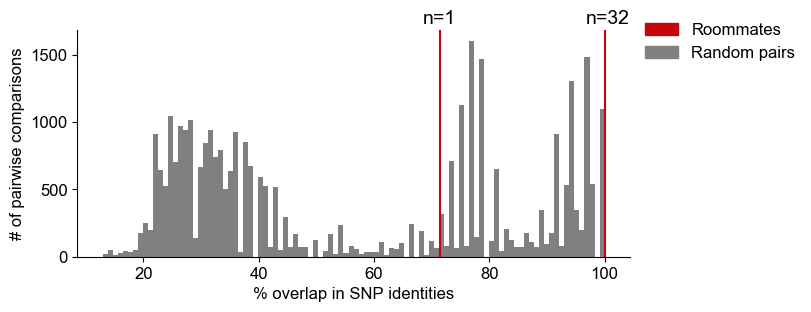

In [13]:
percent_overlap_10000 = diff(list_of_snps, 33930)

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  

# plot distribution
plt.hist(percent_overlap_10000, 100, color='grey')

# plot household pairs
plt.axvline(x=roommates1, color='#c5050c')
plt.axvline(x=roommates29, color='#c5050c')

textstr1 = 'n=32'
textstr2 = 'n=1'


ax1.set_ylabel('# of pairwise comparisons',fontsize=12)
ax1.set_xlabel('% overlap in SNP identities',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)

#legend
A = mpatches.Patch(color='#c5050c', label='Roommates')
B = mpatches.Patch(color='grey', label='Random pairs')

ax1.text(0.92, 1.09, textstr1, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top')
ax1.text(0.625, 1.09, textstr2, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top')


plt.legend(handles=(A, B), frameon=False, bbox_to_anchor=[1, 1.1], fontsize=12)


# plt.savefig("figures/within-vs-between-roomies.svg", bbox_inches='tight', dpi=300)
# plt.savefig("figures/within-vs-between-household.png", bbox_inches='tight', dpi=300)


In [19]:
percent_overlap_10000.count(100.0)

1094

In [245]:
unique_snps = get_unique_snps('VCFs/Cleaned/', cleaned)
unique_snps

,SNP
0,241_C>T
1,1059_C>T
2,3037_C>T
3,3773_C>T
4,6793_G>T
...,...
176,21638_C>T
177,21639_C>A
178,22205_G>T
179,22687_C>T


In [64]:
nextclade = pd.read_csv('../nextclade.csv', sep=';')
nextclade = nextclade[['seqName', 'substitutions']]
nextclade.to_csv('../nextclade_abridged.csv',sep=',')

# hh5 = [C241T,T833C,C1059T,C3037T,C14408T,G17298T,G20087A,A20097T,A23403G,G25563T,C27964T,C241T,A696C,C1059T,C3037T,G8561A,C14408T,A23403G,A23845T,G25563T,C27964T]

# Counter(hh5)